# CAPS Drug Results

In [2]:
%pylab inline
import pandas as pd
import os
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [3]:
sb.set()

# Data

We have data in the data directory set up as a csv. THE CAPSXX columns represent a 12 week difference in survey values. That is (week 12 value) - (week 1 value) for each question. Apparently a reduction in the value is an improvement, so more negative values of the CAPSXX variable mean improvement. 

In [4]:
data_dir = 'data'
csv_data = 'caps5data.csv'

In [5]:
data_path = os.path.join(data_dir, csv_data)
my_data = pd.DataFrame.from_csv(data_path)

/home/lmizuhara/miniconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


## A Little Bit of Data Exploration

In [6]:
my_data.columns

Index(['SITEID', 'SEX', 'CURSMK', 'CMDE', 'TRT01P', 'CAPSB1', 'CAPSB2',
       'CAPSB3', 'CAPSB4', 'CAPSB5', 'CAPSC1', 'CAPSC2', 'CAPSD1', 'CAPSD2',
       'CAPSD3', 'CAPSD4', 'CAPSD5', 'CAPSD6', 'CAPSD7', 'CAPSE1', 'CAPSE2',
       'CAPSE3', 'CAPSE4', 'CAPSE5', 'CAPSE6', 'CAPSSUM1', 'pgic', 'cgi',
       'BaseCapsb1', 'BaseCapsb2', 'BaseCapsb3', 'BaseCapsb4', 'BaseCapsb5',
       'BaseCapsc1', 'BaseCapsc2', 'BaseCapsd1', 'BaseCapsd2', 'BaseCapsd3',
       'BaseCapsd4', 'BaseCapsd5', 'BaseCapsd6', 'BaseCapsd7', 'BaseCapse1',
       'BaseCapse2', 'BaseCapse3', 'BaseCapse4', 'BaseCapse5', 'BaseCapse6',
       'BaseTotal'],
      dtype='object')

In [7]:
my_data.head()

SITEID SEX CURSMK CMDE      TRT01P  CAPSB1  CAPSB2  CAPSB3  CAPSB4  \
SUBJID                                                                        
101-004     101   M      N    N     Placebo       0      -3       0      -2   
101-008     101   M      N    Y     Placebo      -3       3       0      -3   
101-009     101   F      N    N     Placebo      -1       0       0      -2   
102-001     102   M      Y    N  TNX-102 SL      -3       2       0      -2   
102-005     102   M      Y    N  TNX-102 SL      -3      -4       0      -3   

         CAPSB5    ...      BaseCapsd5  BaseCapsd6  BaseCapsd7  BaseCapse1  \
SUBJID             ...                                                       
101-004      -2    ...               3           3           3           2   
101-008      -3    ...               3           3           2           2   
101-009      -2    ...               2           3           0           2   
102-001       0    ...               3           3           3           3   
102-005      -3    ...               3           3           2           0   

         BaseCapse2  BaseCapse3  BaseCapse4  BaseCapse5  BaseCapse6  BaseTotal  
SUBJID                                                                          
101-004           0           3           3           2           3         36  
101-008           2           3           2           2           4         43  
101-009           0           3           0           3           0         37  
102-001           0           3           2           4           4         42  
102-005           0           2           3           2           4         44  

[5 rows x 49 columns]

In [8]:
data_columns = my_data.columns[my_data.columns.str.startswith("CAPS")][:-1] # Total column is the last one, apparently not useful

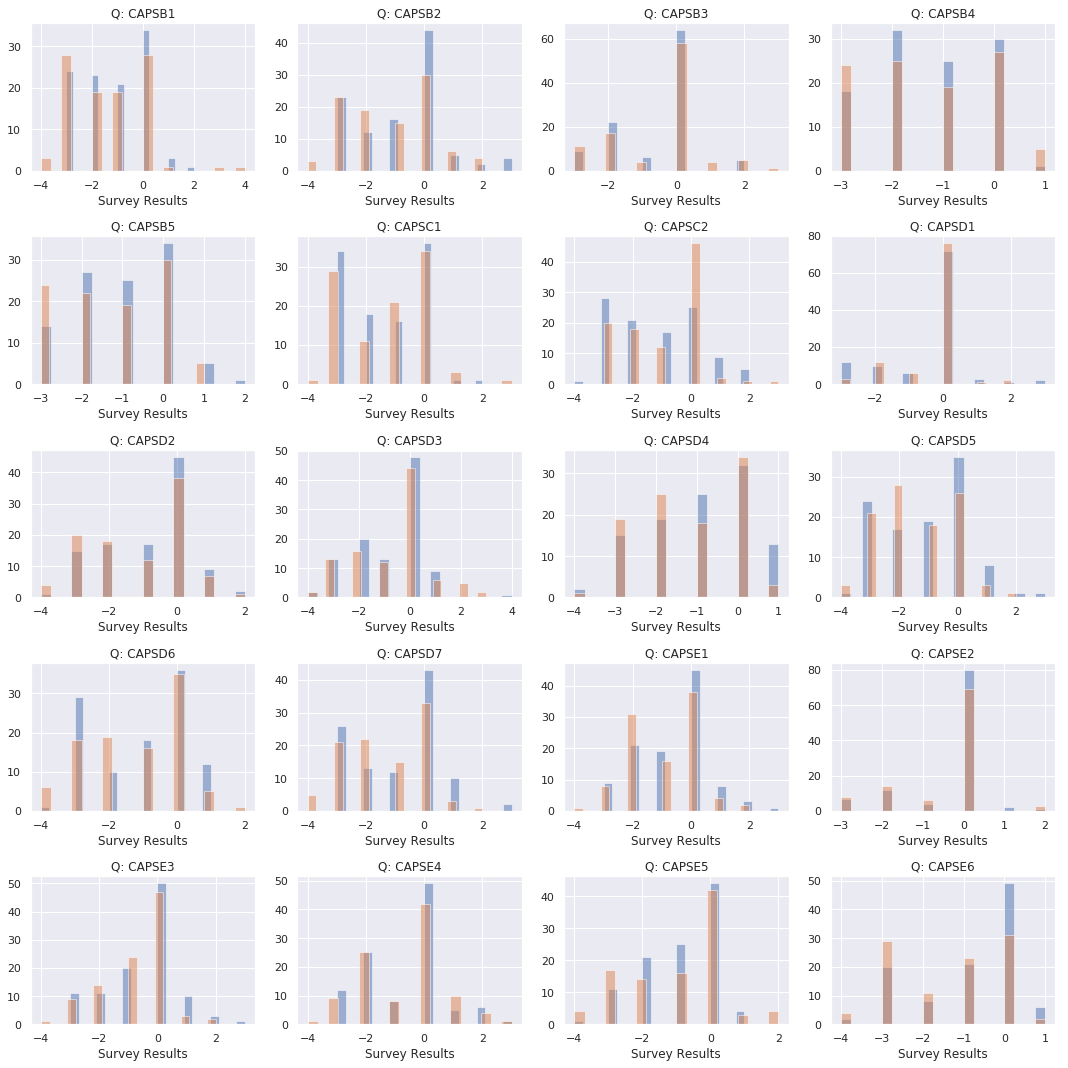

In [9]:
fig, axes = subplots(5, 4, figsize=(15,15))
is_placebo = my_data['TRT01P'] == 'Placebo'
placebo_df = my_data[is_placebo]
drug_df = my_data[~is_placebo]
j = 0
modn = 4
for i, col in enumerate(data_columns):
    if (i%modn) == 0 and i != 0:
        j += 1
    ax=axes[j, i % modn]
    ax.hist(placebo_df[data_columns[i]], alpha=.5, bins=20, label='placebo')
    ax.hist(drug_df[data_columns[i]], alpha=.5, bins=20, label='drug')
    ax.set_xlabel('Survey Results')
    ax.set_title("Q: %s"  % col)

fig.tight_layout()

# PCA from statsmodels

In [10]:
from statsmodels.multivariate.pca import PCA

In [11]:
placebo_pca = PCA(placebo_df[data_columns], standardize=False, demean=False, normalize=False)
drug_pca = PCA(drug_df[data_columns], standardize=False, demean=False, normalize=False)
all_pca = PCA(my_data[data_columns], standardize=False, demean=False, normalize=False)

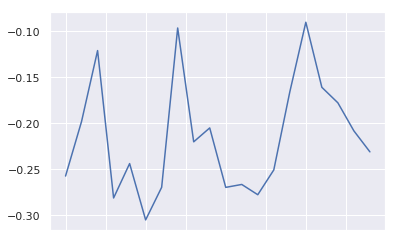

In [12]:
pd.Series(placebo_pca.eigenvecs['eigenvec_00'].values, index=data_columns).plot(label='placebo')

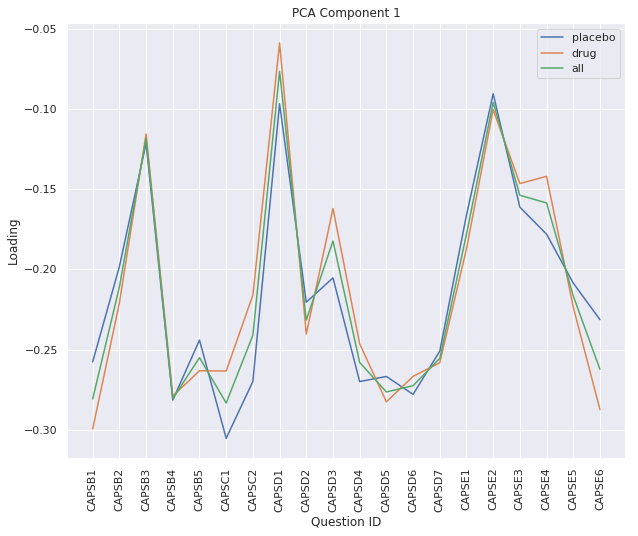

In [13]:
fig, ax = subplots(1,1, figsize=(10, 8))

pd.Series(placebo_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns).plot(label='placebo', ax=ax)
pd.Series(-drug_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns).plot(label='drug', ax=ax)
pd.Series(all_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns).plot(label='all', ax=ax)

ax.set_xticks(np.arange(len(data_columns)))
ax.set_xticklabels(data_columns, rotation=90)
ax.legend();
ax.set_title("PCA Component 1");
ax.set_xlabel("Question ID");
ax.set_ylabel("Loading");

In [23]:
a = pd.Series(placebo_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns)
b = pd.Series(-drug_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns)
c = pd.Series(all_pca.eigenvecs['eigenvec_00'].values, 
          index=data_columns)
d = pd.concat((a, b, c), axis = 1)

d.columns = ['placebo', 'drug', 'all']

In [24]:
d

placebo      drug       all
CAPSB1 -0.257650 -0.299497 -0.280829
CAPSB2 -0.198233 -0.220927 -0.210901
CAPSB3 -0.121174 -0.115508 -0.118164
CAPSB4 -0.281484 -0.278952 -0.280592
CAPSB5 -0.244078 -0.263220 -0.255035
CAPSC1 -0.305354 -0.263385 -0.283328
CAPSC2 -0.269883 -0.216018 -0.241063
CAPSD1 -0.096612 -0.058651 -0.076392
CAPSD2 -0.220430 -0.240255 -0.231608
CAPSD3 -0.205282 -0.161984 -0.182226
CAPSD4 -0.269962 -0.246394 -0.258029
CAPSD5 -0.266783 -0.282607 -0.276461
CAPSD6 -0.277951 -0.266730 -0.272550
CAPSD7 -0.250996 -0.258193 -0.255439
CAPSE1 -0.166098 -0.187147 -0.178025
CAPSE2 -0.090355 -0.100274 -0.095742
CAPSE3 -0.161120 -0.146418 -0.153717
CAPSE4 -0.177982 -0.141882 -0.158479
CAPSE5 -0.208512 -0.223459 -0.216521
CAPSE6 -0.231328 -0.287488 -0.262336

PCA formulation: 

$ X = FL' $

X is the data

F are "scores"

L are "loadings"

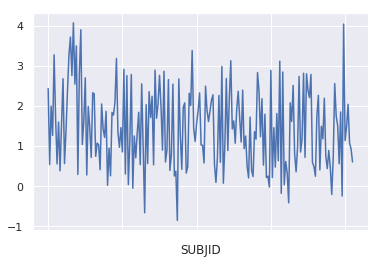

In [15]:
(all_pca.scores['comp_00']/all_pca.scores['comp_00'].std()).plot()

In [16]:
all_pca.loadings.iloc[:,0]*all_pca.scores['comp_00'].std()

CAPSB1   -0.873114
CAPSB2   -0.655704
CAPSB3   -0.367377
CAPSB4   -0.872375
CAPSB5   -0.792918
CAPSC1   -0.880881
CAPSC2   -0.749476
CAPSD1   -0.237508
CAPSD2   -0.720083
CAPSD3   -0.566551
CAPSD4   -0.802227
CAPSD5   -0.859532
CAPSD6   -0.847372
CAPSD7   -0.794173
CAPSE1   -0.553489
CAPSE2   -0.297668
CAPSE3   -0.477915
CAPSE4   -0.492720
CAPSE5   -0.673175
CAPSE6   -0.815617
Name: comp_00, dtype: float64

In [17]:
percent_explained = (all_pca.eigenvals / all_pca.eigenvals.sum())*100

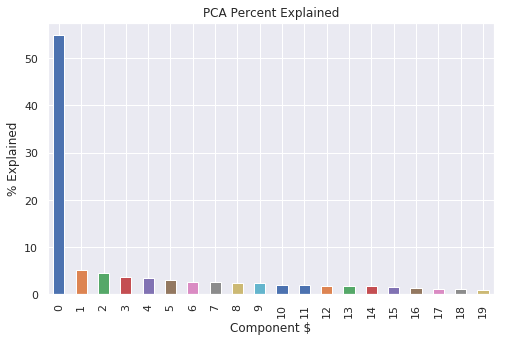

In [18]:
fig, ax = subplots(1,1, figsize=(8,5))
percent_explained.plot(kind='bar');
ax.set_title("PCA Percent Explained");
ax.set_xlabel("Component $");
ax.set_ylabel("% Explained");

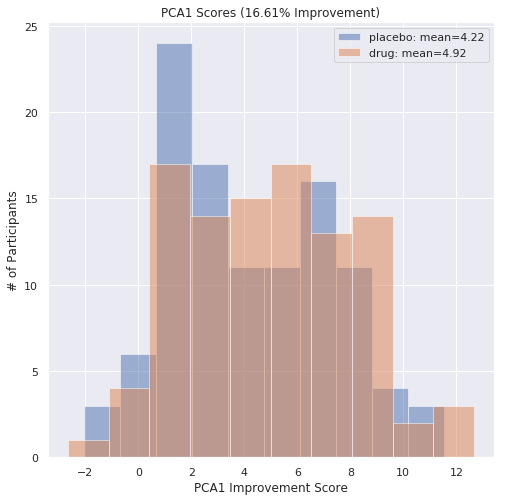

In [19]:
fig, ax = subplots(1,1, figsize=(8, 8));

placebo_mean = all_pca.factors['comp_00'][is_placebo].mean()
drug_mean = all_pca.factors['comp_00'][~is_placebo].mean()

all_pca.factors['comp_00'][is_placebo].hist(alpha=0.5, label='placebo: mean=%.2f' % placebo_mean);
(all_pca.factors['comp_00'][~is_placebo]).hist(alpha=0.5, label='drug: mean=%.2f'  % drug_mean);

ax.legend();
p_improvement = (drug_mean-placebo_mean)/placebo_mean *100
ax.set_xlabel('PCA1 Improvement Score');
ax.set_ylabel("# of Participants");
ax.set_title("PCA1 Scores (%.2f%% Improvement)" % (p_improvement));

# Just for Funsies

In [20]:
is_male = my_data['SEX'] == 'M'

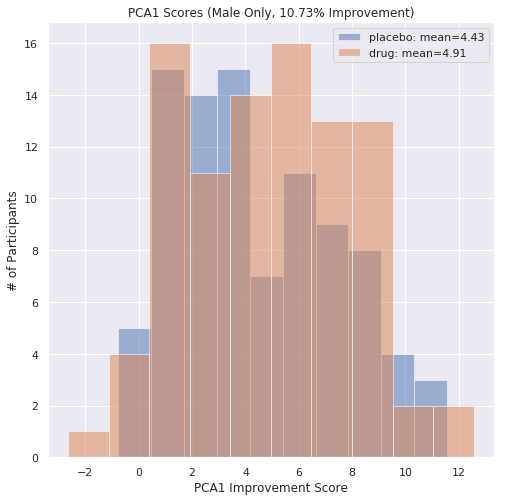

In [21]:
fig, ax = subplots(1,1, figsize=(8, 8));

placebo_mean = all_pca.factors['comp_00'][is_placebo][is_male].mean()
drug_mean = all_pca.factors['comp_00'][~is_placebo][is_male].mean()

all_pca.factors['comp_00'][is_placebo][is_male].hist(alpha=0.5, label='placebo: mean=%.2f' % placebo_mean);
(all_pca.factors['comp_00'][~is_placebo][is_male]).hist(alpha=0.5, label='drug: mean=%.2f'  % drug_mean);

ax.legend();
p_improvement = (drug_mean-placebo_mean)/placebo_mean *100
ax.set_xlabel('PCA1 Improvement Score');
ax.set_ylabel("# of Participants");
ax.set_title("PCA1 Scores (Male Only, %.2f%% Improvement)" % (p_improvement));

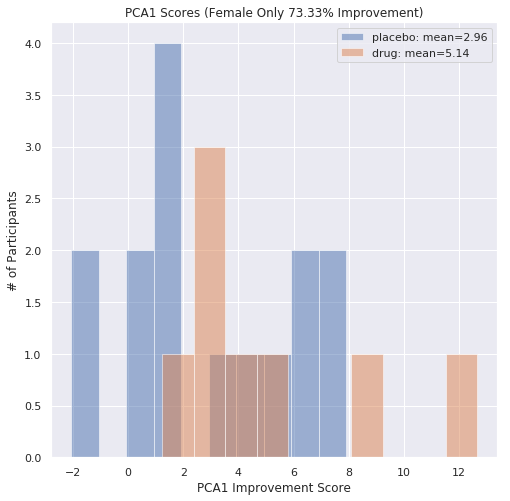

In [22]:
fig, ax = subplots(1,1, figsize=(8, 8));

placebo_mean = all_pca.factors['comp_00'][is_placebo][~is_male].mean()
drug_mean = all_pca.factors['comp_00'][~is_placebo][~is_male].mean()

all_pca.factors['comp_00'][is_placebo][~is_male].hist(alpha=0.5, label='placebo: mean=%.2f' % placebo_mean);
(all_pca.factors['comp_00'][~is_placebo][~is_male]).hist(alpha=0.5, label='drug: mean=%.2f'  % drug_mean);

ax.legend();
p_improvement = (drug_mean-placebo_mean)/placebo_mean *100
ax.set_xlabel('PCA1 Improvement Score');
ax.set_ylabel("# of Participants");
ax.set_title("PCA1 Scores (Female Only %.2f%% Improvement)" % (p_improvement));